In [ ]:
import os
import pandas as pd

import matplotlib.pyplot as plt

/tmp/ipykernel_143937/455046538.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
base_path = '../'

In [ ]:
# Load performance data
performance1_path = os.path.join(base_path, 'volume1_exp.csv')
performance2_path = os.path.join(base_path, 'volume2_exp.csv')
performance3_path = os.path.join(base_path, 'volume3_exp.csv')

performance1_df = pd.read_csv(performance1_path)
performance2_df = pd.read_csv(performance2_path)
performance3_df = pd.read_csv(performance3_path)

performance_df = pd.concat([performance1_df, performance2_df, performance3_df], ignore_index=True)

performance_df.to_csv('../uiuc_data.csv', index=False)

In [73]:
performance_df.dtypes

PropName      object
BladeName     object
Family        object
B              int64
D            float64
P            float64
J            float64
N            float64
CT           float64
CP           float64
eta          float64
dtype: object

## Propellers

In [ ]:
print(performance_df['PropName'].value_counts())
print(performance_df['PropName'].unique())

## Family

In [61]:
print("Unique Families")
print(performance_df['Family'].unique())

Unique Families
['ance' 'apc29ff' 'apccf' 'apce' 'apcsf' 'apcsp' 'grcp' 'grcsp' 'grsn'
 'gwsdd' 'gwssf' 'kavfk' 'kyosho' 'mae' 'magf' 'mas' 'ma' 'rusp' 'zin'
 'apcff' 'da4002' 'da4022' 'da4052' 'ef' 'kpf' 'mit' 'mi' 'pl' 'vp'
 'nr640' 'union' 'ancf']


## Models

In [62]:
print("Unique Propellers")
print(len(performance_df['PropName'].unique()))

Unique Propellers
240


## Number of blades


In [63]:
print("Unique number of blades")
print(performance_df['B'].unique())

Unique number of blades
[2 3 4]


In [67]:
unique_blades = performance_df.drop_duplicates(subset="PropName")

# Contar o número de hélices por número de pás (coluna 'B')
count_by_blades = unique_blades["B"].value_counts().sort_index()

print('Contagem de hélices por número de pás')
print(count_by_blades)

# Contar o número de hélices por diametro (coluna 'D')
count_by_diameter = unique_blades["D"].value_counts().sort_index()

print()

print('Contagem de hélices por diametro (polegadas)')
print(count_by_diameter)

Contagem de hélices por número de pás
B
2    226
3      7
4      7
Name: count, dtype: int64

Contagem de hélices por diametro (polegadas)
D
1.200000      1
1.300000      1
2.244094      1
2.500000      2
3.000000      2
3.200000      1
3.779528      1
3.937008      1
4.000000      3
4.200000      2
4.300000      1
4.500000      2
5.000000     22
5.118110      1
5.511811      1
7.000000      3
7.400000      1
7.800000      2
8.000000     15
8.500000      2
9.000000     65
10.000000    34
11.000000    50
12.000000     6
12.500000     3
13.000000     4
14.000000     6
15.000000     3
16.000000     2
17.000000     1
19.000000     1
Name: count, dtype: int64


## Plots

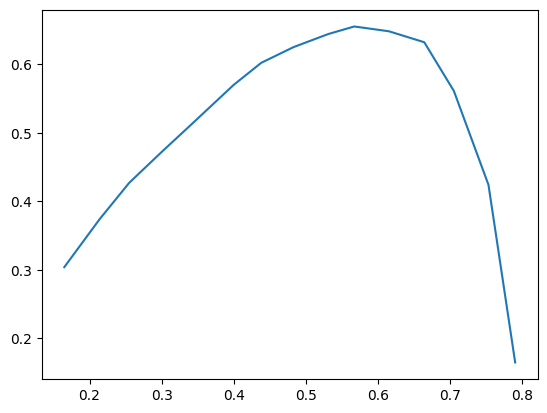

In [78]:
plot_data = performance_df[performance_df['PropName'] == 'ance 8.5x6.0 - 2']
plot_data = plot_data[plot_data['N'] == 4000]

x_points = plot_data['J']
y_points = plot_data['eta']

plt.plot(x_points, y_points)
plt.show()